In [1]:
import datajoint as dj
import numpy as np
import tifffile as tf
import matplotlib.pyplot as plt
import retinotopic_mapping
import retinotopic_mapping.tools.FileTools as ft
import retinotopic_mapping.RetinotopicMapping as rm

In [2]:
# Set up your connection to the database server
dj.config['database.host'] = '139.91.171.210:3306'
dj.config['database.user'] = 'eflab'
dj.config['database.password'] = 'cajal123'

dj.conn()

Connecting eflab@139.91.171.210:3306


DataJoint connection (connected) eflab@139.91.171.210:3306

In [3]:
# list the names of database schemas available to you
# dj.list_schemas()

In [3]:
# we start by creating a schema object to connect to the chosen database schema
schema = dj.schema('pipeline_map')
# schema = dj.schema('tutorial', locals())
# If the schema already exists, dj.schema is initialized as usual and you may plot the schema diagram.
# But instead of seeing class names, you will see the raw table names as they appear in the database.

In [5]:
# let's plot its diagram -- gives error!!
#dj.Diagram(schema)

In [4]:
# to spawn classes into the local namespace for any tables missing their classes
schema.spawn_missing_classes()

In [5]:
opt_image_bar = OptImageBar()
opt_image_bar

*animal_id    *session    *scan_idx    *axis          amp        ang        vessels    selected     pxpitch     
+-----------+ +---------+ +----------+ +------------+ +--------+ +--------+ +--------+ +----------+ +----------+
9254          1           4            horizontal     =BLOB=     =BLOB=     =BLOB=     1            7.421875    
9254          1           5            vertical       =BLOB=     =BLOB=     =BLOB=     1            7.421875    
9329          1           4            horizontal     =BLOB=     =BLOB=     =BLOB=     1            7.421875    
9329          1           5            vertical       =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          1           6            horizontal     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          2           5            horizontal     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          2           6            vertical       =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9508          1           5            horizontal     =BLOB=     =BLOB=     =BLOB=     1            7.421875    
9508          1           6            vertical       =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9579          1           6            horizontal     =BLOB=     =BLOB=     =BLOB=     1            7.421875    
9579          1           7            vertical       =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9580          1           4            horizontal     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
   ...
 (Total: 144)

In [6]:
ret_map_scan = RetMapScan()
ret_map_scan

*animal_id    *ret_idx    *session    *scan_idx    *axis         
+-----------+ +---------+ +---------+ +----------+ +------------+
9254          1           1           4            horizontal    
9254          1           1           5            vertical      
9329          1           1           5            vertical      
9329          1           1           6            horizontal    
9508          1           1           5            horizontal    
9508          1           1           6            vertical      
9579          1           1           6            horizontal    
9579          1           1           7            vertical      
9580          1           2           5            horizontal    
9580          1           2           6            vertical      
10417         1           1           7            horizontal    
10417         1           1           8            vertical      
   ...
 (Total: 83)

In [7]:
# query data for animal 9254 only
query = opt_image_bar & 'animal_id = 9329'
query

*animal_id    *session    *scan_idx    *axis          amp        ang        vessels    selected     pxpitch     
+-----------+ +---------+ +----------+ +------------+ +--------+ +--------+ +--------+ +----------+ +----------+
9329          1           4            horizontal     =BLOB=     =BLOB=     =BLOB=     1            7.421875    
9329          1           5            vertical       =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          1           6            horizontal     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          2           5            horizontal     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          2           6            vertical       =BLOB=     =BLOB=     =BLOB=     0            7.421875    
 (Total: 5)

In [8]:
# split horizontal (azi) and vertical (alt)
azi_query = query & 'axis = "horizontal"'
azi_query

*animal_id    *session    *scan_idx    *axis          amp        ang        vessels    selected     pxpitch     
+-----------+ +---------+ +----------+ +------------+ +--------+ +--------+ +--------+ +----------+ +----------+
9329          1           4            horizontal     =BLOB=     =BLOB=     =BLOB=     1            7.421875    
9329          1           6            horizontal     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          2           5            horizontal     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
 (Total: 3)

In [9]:
# split horizontal (azi) and vertical (alt)
alt_query = query & 'axis = "vertical"'
alt_query

*animal_id    *session    *scan_idx    *axis        amp        ang        vessels    selected     pxpitch     
+-----------+ +---------+ +----------+ +----------+ +--------+ +--------+ +--------+ +----------+ +----------+
9329          1           5            vertical     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
9329          2           6            vertical     =BLOB=     =BLOB=     =BLOB=     0            7.421875    
 (Total: 2)

In [10]:
azi_amp, azi_ang, azi_vessels = azi_query.fetch('amp', 'ang', 'vessels')
alt_amp, alt_ang, alt_vessels = alt_query.fetch('amp', 'ang', 'vessels')


In [11]:
azi_vessels.shape

(3,)

Text(0.5, 1.0, 'alt_vessels')

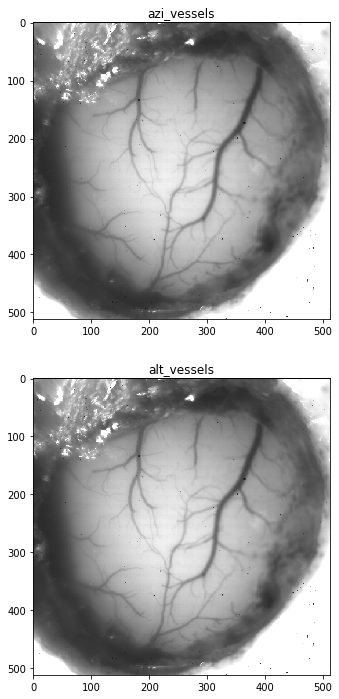

In [12]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(azi_vessels[1], cmap='gray', interpolation='nearest')
plt.title('azi_vessels')

plt.subplot(212)
plt.imshow(alt_vessels[0], cmap='gray', interpolation='nearest')
plt.title('alt_vessels')

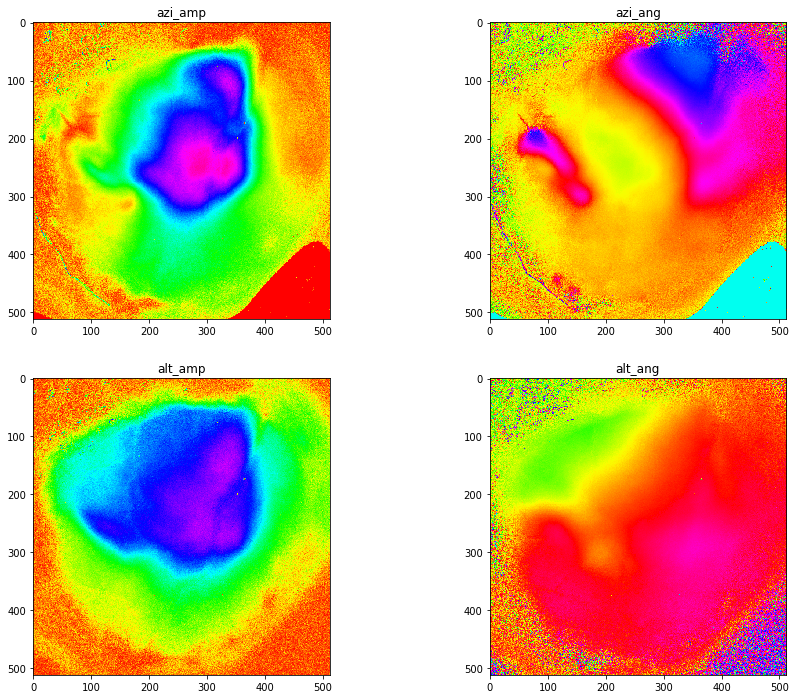

In [13]:
f = plt.figure(figsize=(15, 12))

plt.subplot(221)
plt.imshow(azi_amp[1], cmap='hsv', interpolation='nearest')
plt.title('azi_amp')

plt.subplot(222)
plt.imshow(azi_ang[1], cmap='hsv', interpolation='nearest')
plt.title('azi_ang')

plt.subplot(223)
plt.imshow(alt_amp[0], cmap='hsv', interpolation='nearest')
plt.title('alt_amp')

plt.subplot(224)
plt.imshow(alt_ang[0], cmap='hsv', interpolation='nearest')
plt.title('alt_ang')

plt.show()

In [16]:
params = {
          'phaseMapFilterSigma': 0.5,
          'signMapFilterSigma': 8.,
          'signMapThr': 0.4,
          'eccMapFilterSigma': 15.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [17]:
trial = rm.RetinotopicMappingTrial(altPosMap=alt_ang[0],
                                   aziPosMap=azi_ang[1],
                                   altPowerMap=alt_amp[0],
                                   aziPowerMap=azi_amp[1],
                                   vasculatureMap=azi_vessels[1],
                                   mouseID='9329',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

In [18]:
print (trial)

A retinotopic mapping trial: 160612_M9329


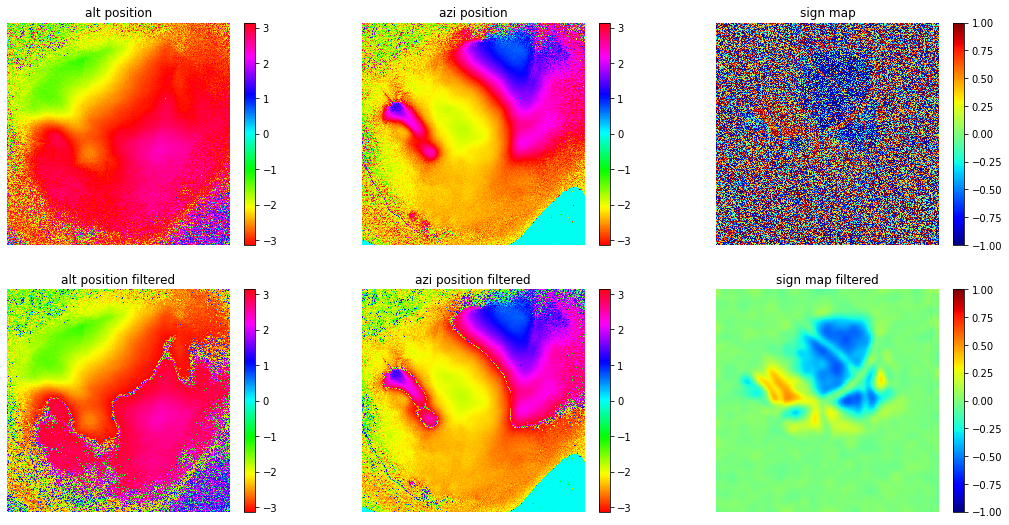

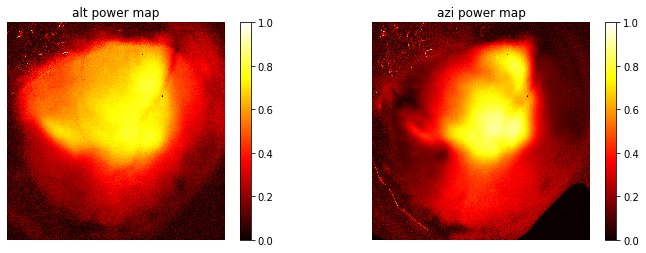

In [19]:
_ = trial._getSignMap(isPlot=True,isFixedRange=False)
plt.show()

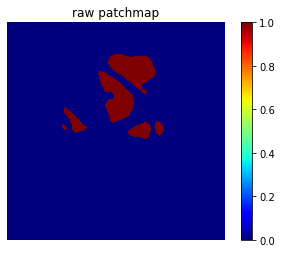

In [20]:
_ = trial._getRawPatchMap(isPlot=True)
plt.show()

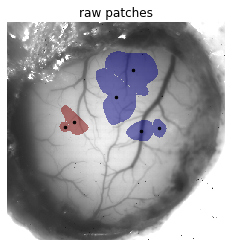

In [21]:
_ = trial._getRawPatches(isPlot=True)
plt.show()

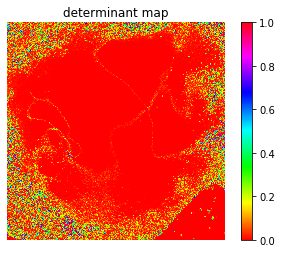

In [22]:
_ = trial._getDeterminantMap(isPlot=True)
plt.show()

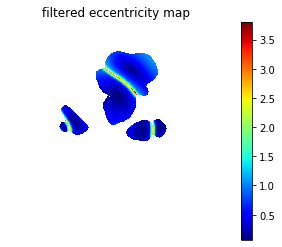

In [23]:
_ = trial._getEccentricityMap(isPlot=True)
plt.show()

patch01AU=5.25 AS=3.6911895 ratio=0.7030837195260184
patch02AU=8.5 AS=6.226132 ratio=0.7324861077701345
patch03AU=6.25 AS=1.0471745 ratio=0.16754791259765625
patch04AU=4.0 AS=2.399033 ratio=0.5997582674026489
patch05AU=0.75 AS=0.84997654 ratio=1.1333020528157551
Only one local minumum was found!!!
patch06AU=3.0 AS=1.2177855 ratio=0.40592849254608154


/home/mariad/retinotopic_mapping/RetinotopicMapping.py:397: RuntimeWarning: invalid value encountered in less_equal
  marker[eccMap2 <= (currThr)] = 1


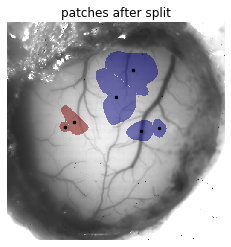

In [24]:
_ = trial._splitPatches(isPlot=True)
plt.show()

merge iteration: 1


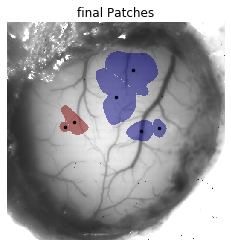

In [25]:
_ = trial._mergePatches(isPlot=True)
plt.show()

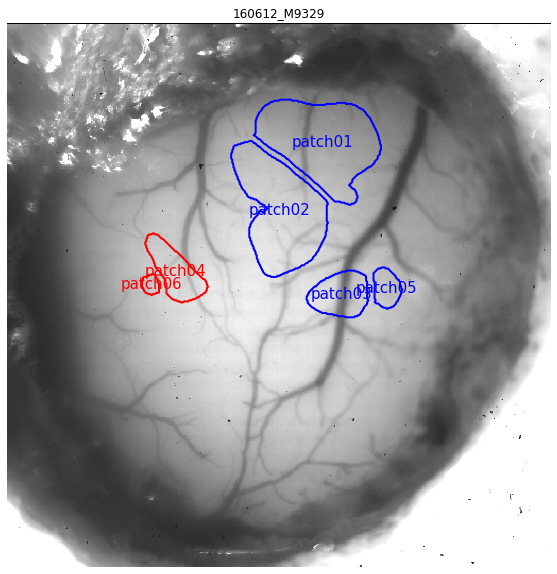

In [26]:
_ = trial.plotFinalPatchBorders2()
plt.show()

In [14]:
paramsd = {
          'phaseMapFilterSigma': 1.,
          'signMapFilterSigma': 9.,
          'signMapThr': 0.35,
          'eccMapFilterSigma': 10.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

triald = rm.RetinotopicMappingTrial(altPosMap=alt_ang[0],
                                   aziPosMap=azi_ang[1],
                                   altPowerMap=alt_amp[0],
                                   aziPowerMap=azi_amp[1],
                                   vasculatureMap=azi_vessels[1],
                                   mouseID='9329',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=paramsd)

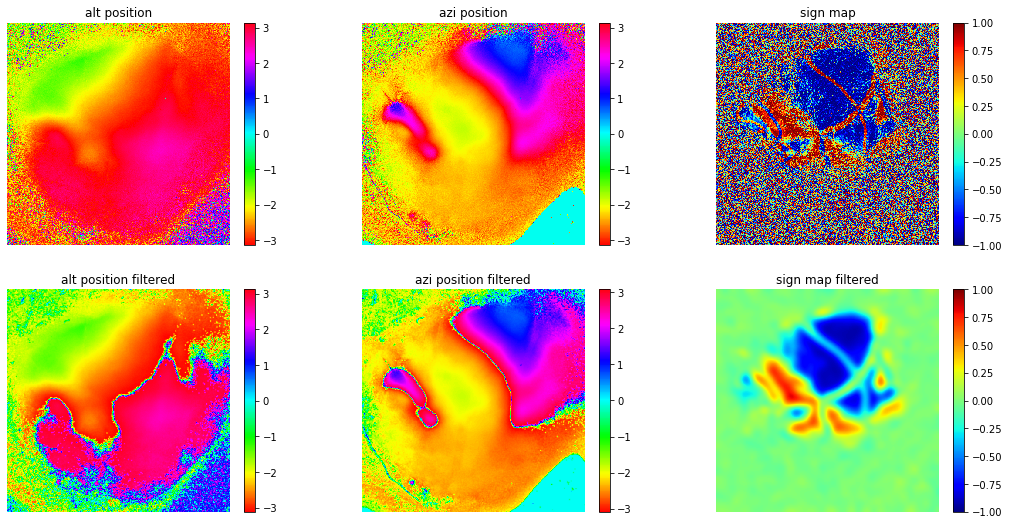

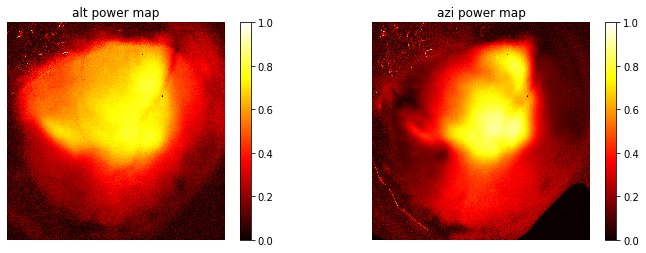

In [16]:
_ = triald._getSignMap(isPlot=True,isFixedRange=False)
plt.show()

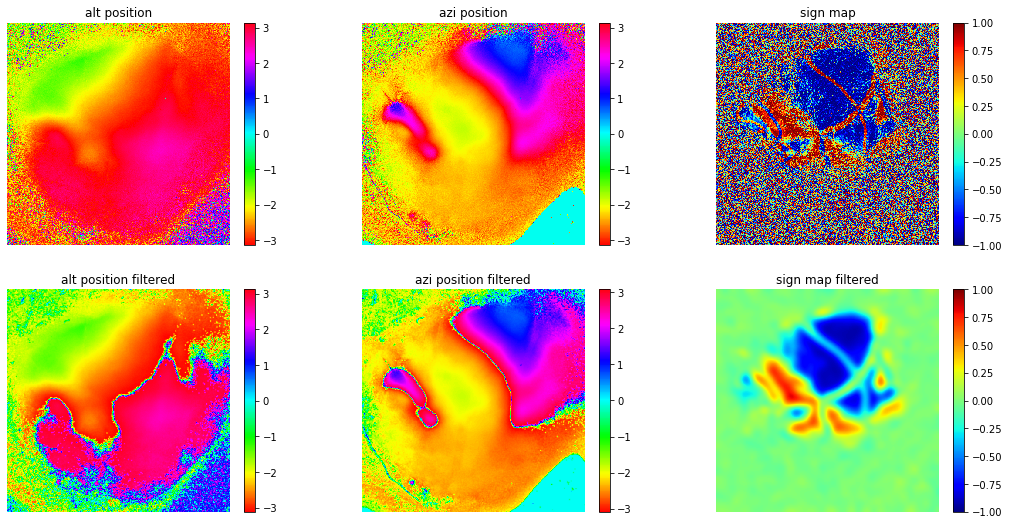

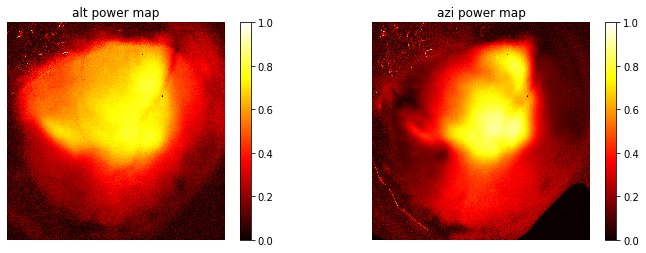

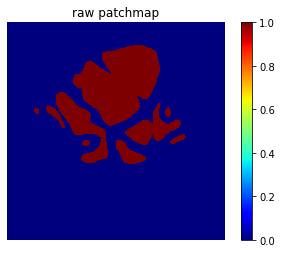

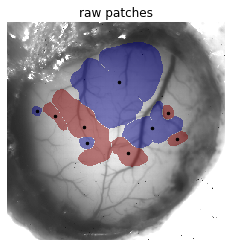

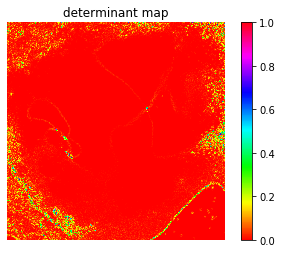

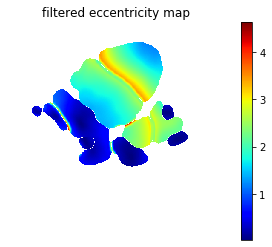

patch01AU=19.0 AS=14.814233 ratio=0.7796964645385742
patch02AU=19.0 AS=8.174029 ratio=0.4302120710674085
patch03AU=16.5 AS=5.2974615 ratio=0.3210582733154297
patch04AU=3.25 AS=0.55563074 ratio=0.17096330569340631
patch05AU=4.75 AS=2.1724143 ratio=0.45735037954230057
patch06AU=0.5 AS=0.13555284 ratio=0.27110567688941956
patch07AU=0.5 AS=0.13211823 ratio=0.2642364501953125
patch08AU=1.5 AS=0.1695062 ratio=0.11300413807233174
patch09AU=1.5 AS=0.38516927 ratio=0.2567795117696126


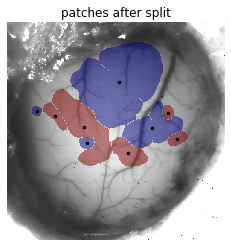

merge iteration: 1


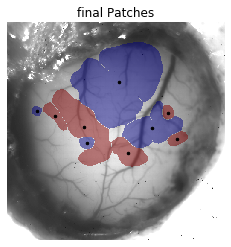

In [17]:
triald.processTrial(isPlot=True)

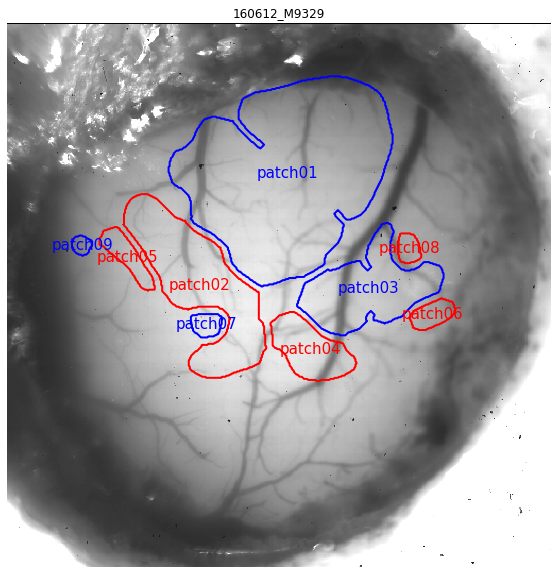

In [18]:
_ = triald.plotFinalPatchBorders2()
plt.show()